In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt 


Importing the Images

In [3]:
def load_images_from_folder(folder_path,label):
    images = []
    labels = []
    count=0
    file_list = os.listdir(folder_path)
    for filename in file_list:
        img_path = os.path.join(folder_path, filename)
        # print(count)
        img = cv2.imread(img_path)
        # print('NO')
        if img is not None:
            images.append(img)
            labels.append(label)
            count+=1
    return np.array(images), np.array(labels)

In [4]:
folder_name=['Class_0','Class_1','Class_2']
images_new=['a','b','c']
labels_new=['a','b','c']
for x in range(len(folder_name)):
    # print(x)
    folder_path = rf'C:\Users\risha\Desktop\IC272\Assignments\Assignment-5\cifar-3class-data\train\{folder_name[x]}'
    images, labels = load_images_from_folder(folder_path,folder_name[x])
    images_new[x]=images
    labels_new[x]=labels
images_new=np.array(images_new)
# images_new[0]
X=np.concatenate((images_new[0],images_new[1],images_new[2]),axis=0)
y=np.concatenate((labels_new[0],labels_new[1],labels_new[2]),axis=0)

# y.shape
# y

In [5]:
X.shape

(1500, 32, 32, 3)

In [6]:
folder_name=['Class_0','Class_1','Class_2']
images_new_test=['a','b','c']
labels_new_test=['a','b','c']
for x in range(len(folder_name)):
    # print(x)
    folder_path = rf'C:\Users\risha\Desktop\IC272\Assignments\Assignment-5\cifar-3class-data\test\{folder_name[x]}'
    images, labels = load_images_from_folder(folder_path,folder_name[x])
    images_new_test[x]=images
    labels_new_test[x]=labels
images_new_test=np.array(images_new_test)

X_t=np.concatenate((images_new_test[0],images_new_test[1],images_new_test[2]),axis=0)
y_t=np.concatenate((labels_new_test[0],labels_new_test[1],labels_new_test[2]),axis=0)

In [7]:
X_t.shape
# y_t.shape

(300, 32, 32, 3)

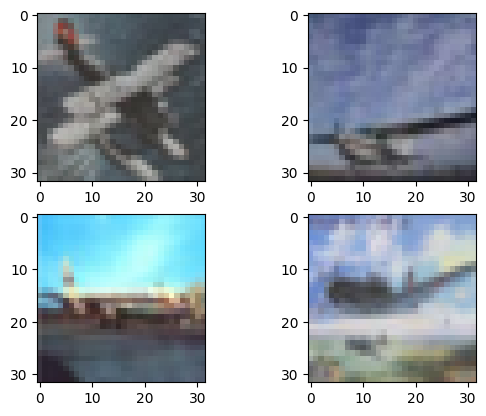

In [8]:
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X[0])
plt.subplot(222)
plt.imshow(X[1])
plt.subplot(223)
plt.imshow(X[2])
plt.subplot(224)
plt.imshow(X[3])
# show the plot
plt.show()

Pre-Processing the data

In [119]:
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.1,random_state=True,shuffle=True)

In [120]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(1350, 32, 32, 3)
(1350,)
(150, 32, 32, 3)
(150,)


In [121]:
X_train

array([[[[ 98, 126, 164],
         [ 97, 125, 159],
         [103, 132, 162],
         ...,
         [ 99, 126, 157],
         [106, 133, 162],
         [103, 130, 157]],

        [[100, 128, 167],
         [ 98, 126, 162],
         [103, 132, 167],
         ...,
         [ 94, 121, 153],
         [102, 129, 158],
         [100, 127, 154]],

        [[101, 129, 169],
         [ 98, 126, 164],
         [109, 137, 175],
         ...,
         [ 94, 121, 153],
         [104, 131, 160],
         [ 98, 126, 153]],

        ...,

        [[ 40,  57,  84],
         [ 78, 102, 137],
         [ 79, 114, 172],
         ...,
         [ 41,  51,  83],
         [ 42,  60,  98],
         [ 83, 109, 162]],

        [[ 29,  46,  68],
         [ 57,  79, 113],
         [ 71, 104, 155],
         ...,
         [ 51,  69, 109],
         [ 56,  81, 132],
         [127, 161, 206]],

        [[ 32,  44,  65],
         [ 54,  71, 100],
         [ 75, 102, 142],
         ...,
         [ 54,  73, 115],
        

In [122]:
def flatten_rgb_images(images):
    flattened_vectors = []
    for image in images:
        flattened_vector = []
        for row in image:
            for pixel in row:
                flattened_vector.extend(pixel)
        flattened_vectors.append(flattened_vector)
    return flattened_vectors




Yes
3072
Yes


In [123]:
def normalize_images(images):
    images_array = np.array(images)

    # Normalize pixel values to the range [0, 1]
    normalized_images = images_array / 255.0

    return normalized_images

In [124]:
X_train_final=flatten_rgb_images(X_train)
X_train_final=normalize_images(X_train_final)
X_val_final=flatten_rgb_images(X_val)
X_val_final=normalize_images(X_val_final)

In [125]:
from tensorflow.keras.utils import to_categorical
def one_hot_encoder(arr):
    class_indices = np.unique(arr, return_inverse=True)[1]
    arr_one_hot = to_categorical(class_indices, num_classes=len(np.unique(arr)))
    return arr_one_hot

In [126]:
y_train_one_hot=one_hot_encoder(y_train)
y_val_one_hot=one_hot_encoder(y_val)

y_val_one_hot.shape

(150, 3)

In [127]:
X_test_final=flatten_rgb_images(X_t)
X_test_final=normalize_images(X_test_final)
y_test_final=one_hot_encoder(y_t)


Model Fully Connected Neural Network

In [128]:
epochs=500
batches=200

In [129]:
import tensorflow as tf
from tensorflow.keras import layers,models

model = models.Sequential()

# model.add(layers.Flatten(input_shape=(32, 32, 3)))
model.add(layers.InputLayer(input_shape=(3072,)))
# model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_81 (Dense)            (None, 256)               786688    
                                                                 
 dense_82 (Dense)            (None, 128)               32896     
                                                                 
 dense_83 (Dense)            (None, 64)                8256      
                                                                 
 dense_84 (Dense)            (None, 3)                 195       
                                                                 
Total params: 828035 (3.16 MB)
Trainable params: 828035 (3.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/500
5/7 [====================>.........] - ETA: 0s - loss: 2.0772 - accuracy: 0.3120
Epoch 1: val_accuracy improved from -inf to 0.38667, saving model to FCCN_best_model.h5
7/7 [==============================] - 1s 52ms/step - loss: 1.9555 - accuracy: 0.3193 - val_loss: 1.3449 - val_accuracy: 0.3867
Epoch 2/500
5/7 [====================>.........] - ETA: 0s - loss: 1.2717 - accuracy: 0.3420
Epoch 2: val_accuracy did not improve from 0.38667
7/7 [==============================] - 0s 20ms/step - loss: 1.2217 - accuracy: 0.3548 - val_loss: 1.1232 - val_accuracy: 0.3200
Epoch 3/500


c:\Users\risha\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5/7 [====================>.........] - ETA: 0s - loss: 1.1093 - accuracy: 0.3560
Epoch 3: val_accuracy improved from 0.38667 to 0.40667, saving model to FCCN_best_model.h5
7/7 [==============================] - 0s 25ms/step - loss: 1.0824 - accuracy: 0.3941 - val_loss: 1.1380 - val_accuracy: 0.4067
Epoch 4/500
5/7 [====================>.........] - ETA: 0s - loss: 1.0065 - accuracy: 0.5020
Epoch 4: val_accuracy improved from 0.40667 to 0.66667, saving model to FCCN_best_model.h5
7/7 [==============================] - 0s 25ms/step - loss: 1.0140 - accuracy: 0.5022 - val_loss: 0.9285 - val_accuracy: 0.6667
Epoch 5/500
5/7 [====================>.........] - ETA: 0s - loss: 0.9583 - accuracy: 0.5390
Epoch 5: val_accuracy did not improve from 0.66667
7/7 [==============================] - 0s 19ms/step - loss: 0.9428 - accuracy: 0.5541 - val_loss: 0.9267 - val_accuracy: 0.5667
Epoch 6/500
5/7 [====================>.........] - ETA: 0s - loss: 0.9190 - accuracy: 0.5930
Epoch 6: val_accuracy d

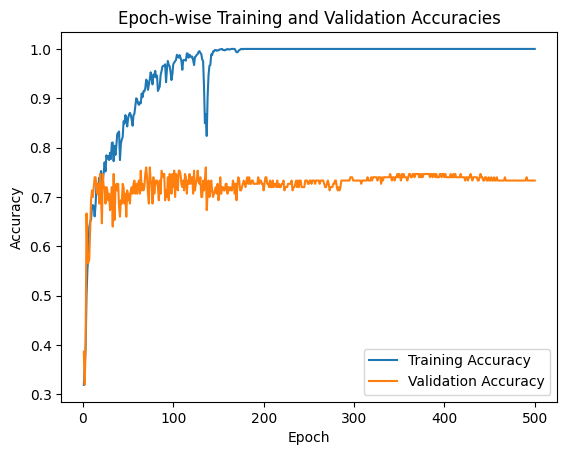

In [130]:
from tensorflow.keras.callbacks import ModelCheckpoint


checkpoint_filepath = 'FCCN_best_model.h5'
model_checkpoint = ModelCheckpoint(checkpoint_filepath, 
                                   monitor='val_accuracy', 
                                   save_best_only=True,
                                   mode='max',
                                   verbose=1)


history = model.fit(X_train_final, y_train_one_hot, epochs=epochs, batch_size=batches, validation_data=(X_val_final, y_val_one_hot),callbacks=[model_checkpoint])

# Plotting training and validation accuracies
plt.plot(np.arange(1, epochs + 1), history.history['accuracy'], label='Training Accuracy')
plt.plot(np.arange(1, epochs + 1), history.history['val_accuracy'], label='Validation Accuracy')

# Add labels and legend
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Epoch-wise Training and Validation Accuracies')
plt.legend()
plt.show()
# Save the model
# model.save('perceptron_model.h5')

In [131]:

loaded_model = tf.keras.models.load_model('FCCN_best_model.h5')
y_pred = loaded_model.predict(X_test_final)

y_pred_classes = tf.argmax(y_pred, axis=1)
y_true_classes = tf.argmax(y_test_final, axis=1)

test_results = loaded_model.evaluate(X_test_final, y_test_final, verbose=0)

test_loss = test_results[0]
test_accuracy = test_results[1]

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


10/10 [==============================] - 0s 3ms/step
Test Loss: 0.8909
Test Accuracy: 73.67%


Convolutional Neural Network 

In [132]:
epochs=50
batches=200

In [133]:
X_train_CNN=normalize_images(X_train)
X_val_CNN=normalize_images(X_val)
X_test_CNN=normalize_images(X_t)
# print(X_train_CNN.shape)

In [134]:
y_train_CNN=one_hot_encoder(y_train)
# y_test_CNN=one_hot_encoder(y)
y_val_CNN=one_hot_encoder(y_val)
y_test_CNN=one_hot_encoder(y_t)

In [135]:
import tensorflow as tf
from tensorflow.keras import layers, models

model1 = models.Sequential()

model1.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same', input_shape=(32, 32, 3)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same'))
model1.add(layers.MaxPooling2D((2, 2)))

model1.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
model1.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
model1.add(layers.MaxPooling2D((2, 2),padding='same'))

model1.add(layers.Flatten())

model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dense(100, activation='relu'))

model1.add(layers.Dense(3, activation='softmax'))  

model1.compile(optimizer='adam',
              loss='categorical_crossentropy',  
              metrics=['accuracy'])

model1.summary()


Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 conv2d_29 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 16, 16, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_30 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 conv2d_31 (Conv2D)          (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 8, 8, 128)         0         
 ng2D)                                               

Epoch 1/50
7/7 [==============================] - ETA: 0s - loss: 1.1113 - accuracy: 0.3556
Epoch 1: val_accuracy improved from -inf to 0.60000, saving model to CNN_best_model.h5
7/7 [==============================] - 7s 825ms/step - loss: 1.1113 - accuracy: 0.3556 - val_loss: 1.0560 - val_accuracy: 0.6000
Epoch 2/50
7/7 [==============================] - ETA: 0s - loss: 1.0060 - accuracy: 0.5756
Epoch 2: val_accuracy improved from 0.60000 to 0.68667, saving model to CNN_best_model.h5
7/7 [==============================] - 6s 800ms/step - loss: 1.0060 - accuracy: 0.5756 - val_loss: 0.8857 - val_accuracy: 0.6867
Epoch 3/50
7/7 [==============================] - ETA: 0s - loss: 0.8552 - accuracy: 0.6837
Epoch 3: val_accuracy improved from 0.68667 to 0.73333, saving model to CNN_best_model.h5
7/7 [==============================] - 6s 803ms/step - loss: 0.8552 - accuracy: 0.6837 - val_loss: 0.7368 - val_accuracy: 0.7333
Epoch 4/50
7/7 [==============================] - ETA: 0s - loss: 0.74

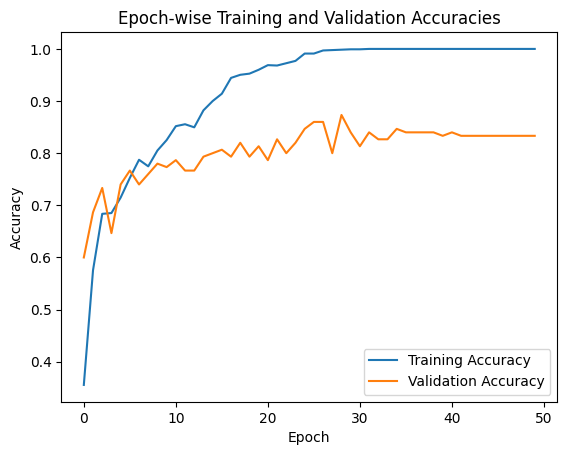

In [136]:
checkpoint = ModelCheckpoint("CNN_best_model.h5", monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
history = model1.fit(X_train_CNN, y_train_CNN, epochs=epochs,batch_size=batches, validation_data=(X_val_CNN, y_val_CNN), callbacks=[checkpoint])

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Epoch-wise Training and Validation Accuracies')
plt.legend()
plt.show()

In [137]:

loaded_model_CNN = tf.keras.models.load_model('CNN_best_model.h5')
y_pred_CNN = loaded_model_CNN.predict(X_test_CNN)

y_pred_CNN_classes = tf.argmax(y_pred_CNN, axis=1)
y_true_classes = tf.argmax(y_test_CNN, axis=1)

test_results_CNN = loaded_model_CNN.evaluate(X_test_CNN, y_test_CNN, verbose=0)

test_loss = test_results_CNN[0]
test_accuracy_CNN = test_results_CNN[1]

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy_CNN * 100:.2f}%')

10/10 [==============================] - 0s 35ms/step
Test Loss: 0.8425
Test Accuracy: 83.33%


In [138]:
y_true_classes
y_pred_CNN_classes

<tf.Tensor: shape=(300,), dtype=int64, numpy=
array([0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 1, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 0, 0, 0,
       0, 0, 2, 0, 0, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 2, 1, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 1, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
     

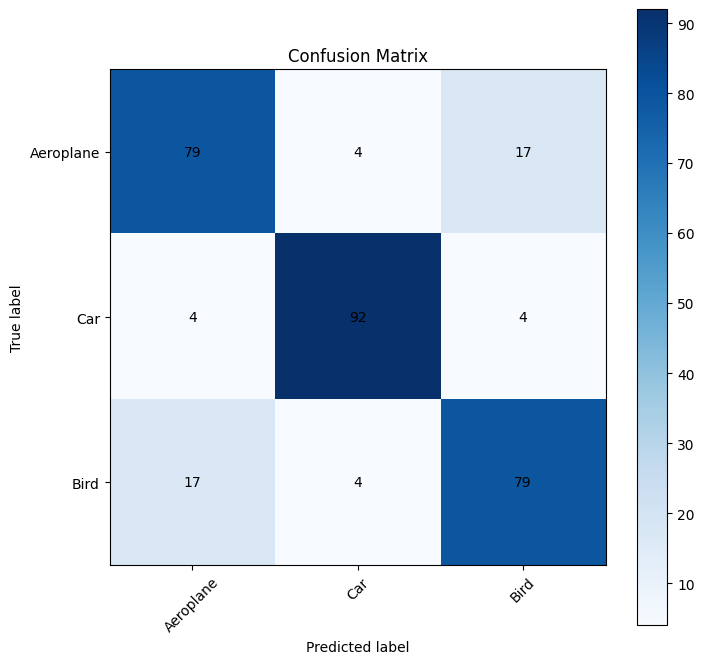

In [139]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_true_classes,y_pred_CNN_classes)
plt.figure(figsize=(8, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = ["Aeroplane", "Car","Bird"]  
tick_marks = np.arange(len(classes))

plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.ylabel('True label')
plt.xlabel('Predicted label')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center')

plt.show()

plt.show()